**Mounting google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Install additional required packages**

In [ ]:
!pip install 'scanpy[leiden]'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 115.6 MB/s eta 0:00:00


**Import required packages**

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd

**Exploring scRNAseq dataset of Fallopian Tube cells**:

The dataset includes benign samples from 5 patients , and high grade serous ovarian carcinoma (HGOC) samples from 5 patients.

High-grade serous ovarian cancer (HGOC) is the most common and aggressive type of epithelial ovarian cancer.

It is hypothesised to originate from Serous tubal intraepithelial carcinoma (STIC) cells in the fallopian tube.


**Read in data**


In [ ]:
hu = sc.read_h5ad('/content/drive/MyDrive/scRNAproj/data/Hufallopiantube.h5ad')

In [ ]:
hu

AnnData object with n_obs × n_vars = 4557 × 22109
    obs: 'Patient', 'Author', 'Tissue', 'Disease_stage', 'Age'

**View the structure of the data**

In [ ]:
hu.layers["counts"] = hu.X.copy()

**View the meta data**

In [ ]:
hu.obs

Patient   Author                       Tissue Disease_stage Age
CellID                                                                       
sc_b1_A08       33572  Hu_2020  Benign fallopian tube cells        Benign  64
sc_b1_B06       34350  Hu_2020  Benign fallopian tube cells        Benign  50
sc_b1_B08       34350  Hu_2020  Benign fallopian tube cells        Benign  50
sc_b1_B11       34350  Hu_2020  Benign fallopian tube cells        Benign  50
sc_b1_C15       34350  Hu_2020  Benign fallopian tube cells        Benign  50
...               ...      ...                          ...           ...  ..
15072R-p1-B17   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-B18   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-C01   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-C02   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62
15072R-p1-C03   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62

[4557 rows x 5 columns]

In [ ]:
print("Unique Patient values:", hu.obs['Patient'].unique())
print("Unique Tissue values:", hu.obs['Tissue'].unique())
print("Unique Disease_stage values:", hu.obs['Disease_stage'].unique())

Unique Patient values: ['33572', '34350', '34659', '33778', '35773', '11543', '11545', '15066', '11553', '15072']
Categories (10, object): ['11543', '11545', '11553', '15066', ..., '33778', '34350', '34659', '35773']
Unique Tissue values: ['Benign fallopian tube cells', 'HGSOC fallopian tube cells']
Categories (2, object): ['Benign fallopian tube cells', 'HGSOC fallopian tube cells']
Unique Disease_stage values: ['Benign', 'IV', 'I', 'IIIc', 'IIIc1']
Categories (5, object): ['Benign', 'I', 'IIIc', 'IIIc1', 'IV']


so according to this, we have data from 10 different patients, in 2 different tissues, and each cell can be in one of the five different disease stages

**View the highest expressed genes**

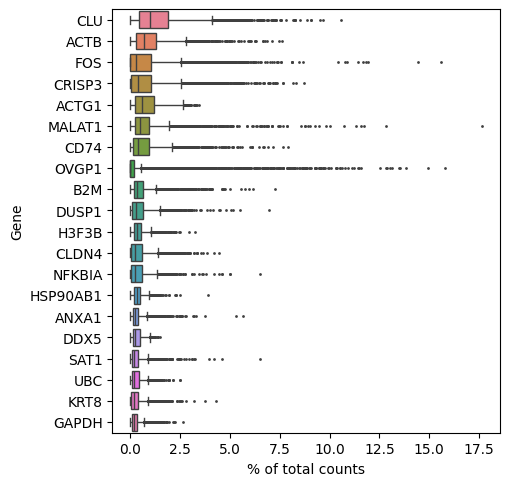

In [ ]:
sc.pl.highest_expr_genes(hu, n_top=20)

**Figure Explanation**:

The above plot visualizes the top 20 genes with the highest expression across all cells in hu.

These often include ribosomal genes, mitochondrial genes, or other housekeeping genes that are expressed at high levels in most cell types.

# **Filtering of the data**:

Cells with a very low number of detected genes are typically considered low-quality. They might be dying cells, empty droplets (in droplet-based sequencing), or cells where RNA capture was inefficient. Including these cells can introduce noise into the dataset and obscure true biological signals, making downstream analysis less reliable.

Genes detected in only a handful of cells are often rare, potentially due to transcriptional noise or very specific biological events that are not broadly representative. Keeping such genes can unnecessarily increase the dimensionality of the dataset, increase computational cost, and make it harder to identify truly biologically relevant genes during differential expression analysis. Filtering them out helps focus on more robust and consistently expressed genes across your cell population.


In [ ]:
sc.pp.filter_cells(hu, min_genes=100)
sc.pp.filter_genes(hu, min_cells=3)

**Calculate quality control metrics**

In [ ]:
sc.pp.calculate_qc_metrics(hu, percent_top=(50, 100,200,500),inplace=True, log1p=False)

**View quality control metrics in a violin plot**


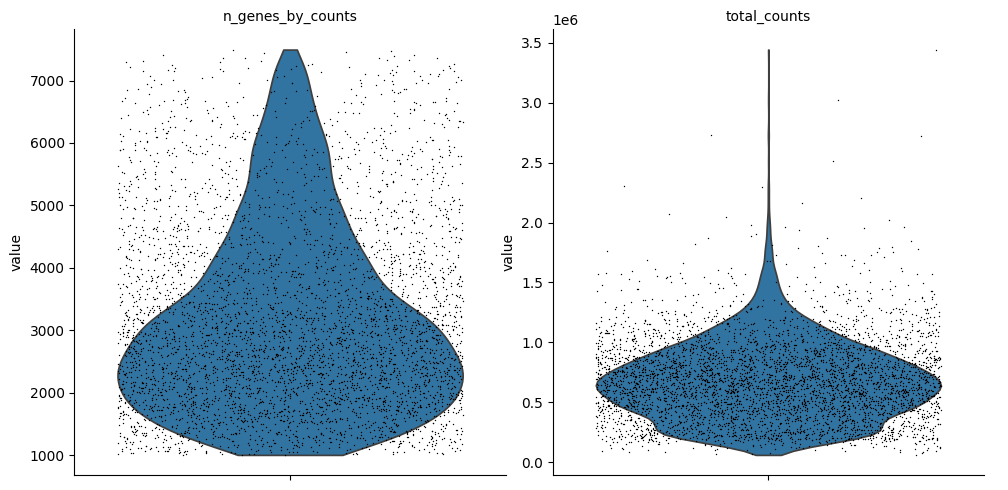

In [ ]:
sc.pl.violin(hu, ['n_genes_by_counts','total_counts'],jitter=0.4, multi_panel=True)

### Figure Explanation:

The violin plots illustrate the density distribution of quality control metrics across all observations, with individual data points overlaid in black. (Left) The n_genes_by_counts plot visualizes the library complexity (unique genes detected), showing a primary density peak between 2,000 and 3,000 genes. (Right) The total_counts plot displays the library size (total RNA reads), revealing a density peak between 0.5×1e6 and 1.0×1e6 reads. The upper tail of the counts distribution (>2.0×1e6) exhibits significantly lower density, indicating rare, high-content observations.

**Filter the cells further by slicing the anndata object on 'n_genes_by_counts' <6000**


In [ ]:
hu = hu[hu.obs.n_genes_by_counts < 6000, :]

**View the structure of the data after filtering steps**

In [ ]:
hu.obs

Patient   Author                       Tissue Disease_stage Age  \
CellID                                                                          
sc_b1_A08       33572  Hu_2020  Benign fallopian tube cells        Benign  64   
sc_b1_B06       34350  Hu_2020  Benign fallopian tube cells        Benign  50   
sc_b1_B08       34350  Hu_2020  Benign fallopian tube cells        Benign  50   
sc_b1_B11       34350  Hu_2020  Benign fallopian tube cells        Benign  50   
sc_b1_C15       34350  Hu_2020  Benign fallopian tube cells        Benign  50   
...               ...      ...                          ...           ...  ..   
15072R-p1-B17   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62   
15072R-p1-B18   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62   
15072R-p1-C01   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62   
15072R-p1-C02   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62   
15072R-p1-C03   15072  Hu_2020   HGSOC fallopian tube cells         IIIc1  62   

               n_genes  n_genes_by_counts  total_counts  \
CellID                                                    
sc_b1_A08         1326               1326      142098.0   
sc_b1_B06         1599               1599      273240.0   
sc_b1_B08         2298               2298      193108.0   
sc_b1_B11         2100               2100      195696.0   
sc_b1_C15         1793               1793      279434.0   
...                ...                ...           ...   
15072R-p1-B17     1640               1640     1097758.0   
15072R-p1-B18     1272               1272      845735.0   
15072R-p1-C01     2517               2517      497898.0   
15072R-p1-C02     2439               2439      284482.0   
15072R-p1-C03     3378               3377      232526.0   

               pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
CellID                                                                   
sc_b1_A08                       24.091824                    36.650058   
sc_b1_B06                       25.742937                    34.621944   
sc_b1_B08                       24.946144                    32.246204   
sc_b1_B11                       20.842020                    29.207546   
sc_b1_C15                       19.775689                    27.739645   
...                                   ...                          ...   
15072R-p1-B17                   24.456210                    34.981754   
15072R-p1-B18                   20.502876                    31.127008   
15072R-p1-C01                   25.400584                    33.235522   
15072R-p1-C02                   24.317532                    32.932488   
15072R-p1-C03                   20.495773                    27.845058   

               pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  
CellID                                                                   
sc_b1_A08                        55.252009                    86.714802  
sc_b1_B06                        47.672010                    74.232909  
sc_b1_B08                        42.474677                    62.877768  
sc_b1_B11                        41.628342                    66.753025  
sc_b1_C15                        39.917118                    66.523043  
...                                    ...                          ...  
15072R-p1-B17                    48.643872                    72.247435  
15072R-p1-B18                    46.902399                    78.237746  
15072R-p1-C01                    43.703730                    62.459781  
15072R-p1-C02                    44.442531                    63.933395  
15072R-p1-C03                    37.170897                    54.816666  

[4283 rows x 12 columns]

# **Dimensionality Reduction and visualisation**




**Normalise and log transform the data**:

In [ ]:
sc.pp.normalize_total(hu, target_sum=1e4)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_normalization.py:269: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
sc.pp.log1p(hu)

**Crop the data to highly variable genes only**:

In [ ]:
sc.pp.highly_variable_genes(hu, min_mean=0.0125, max_mean=3, min_disp=0.5)

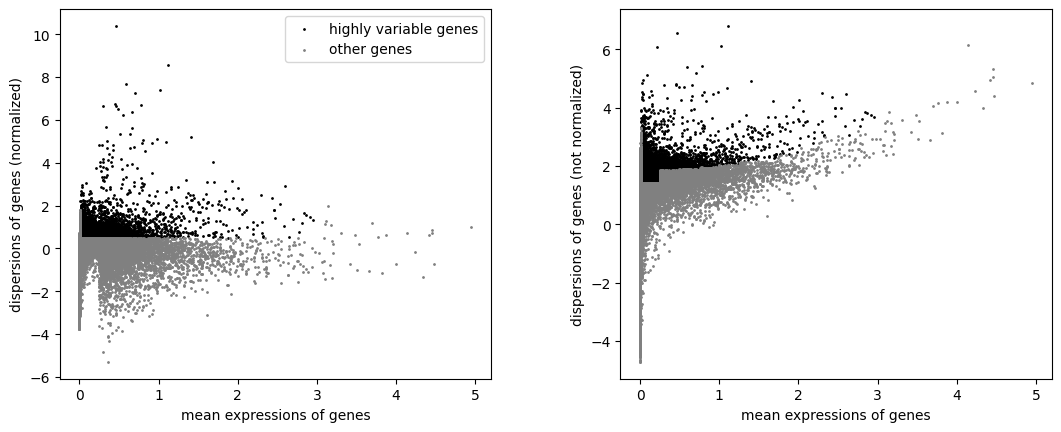

In [ ]:
sc.pl.highly_variable_genes(hu)

### Figure explanation:

The scatter plots visualize the relationship between mean gene expression and dispersion (variance), used to select informative features for downstream analysis. (Left) The plot displays normalized dispersion values against mean expression. Black dots represent genes identified as highly variable based on specific selection criteria (mean expression between 0.0125 and 3; normalized dispersion > 0.5), while grey dots represent genes excluded due to low variance. (Right) The plot shows unnormalized dispersion versus mean expression, which illustrates the raw mean-variance relationship prior to stabilization. The selection of these genes ensures that subsequent dimensionality reduction focuses on biological signal and heterogeneity rather than technical noise.

In [ ]:
hu.raw = hu

In [ ]:
hu = hu [:, hu.var.highly_variable]

In [ ]:
sc.pp.scale(hu, max_value=10)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)


**Calculate and plot a principal component analysis (PCA) elbow plot**:


In [ ]:
sc.tl.pca(hu, svd_solver='arpack')

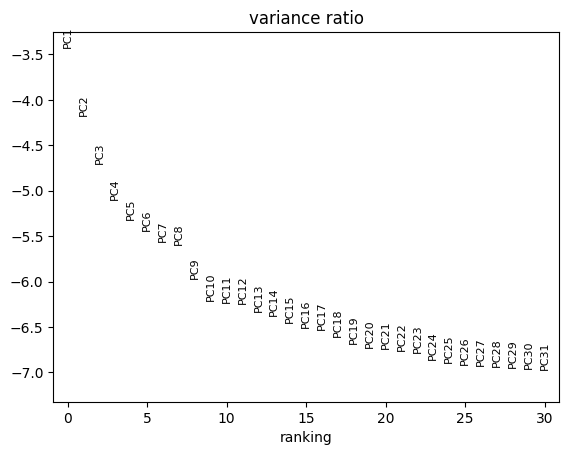

In [ ]:
sc.pl.pca_variance_ratio(hu, log=True)

**Compute the nearest neighbours graph, choose the number of principal components to use based on the elbow of the PCA plot (inflection point)**:

In [ ]:
sc.pp.neighbors(hu, n_pcs=6 )

**Compute and plot the UMAP**


In [ ]:
sc.tl.umap(hu)

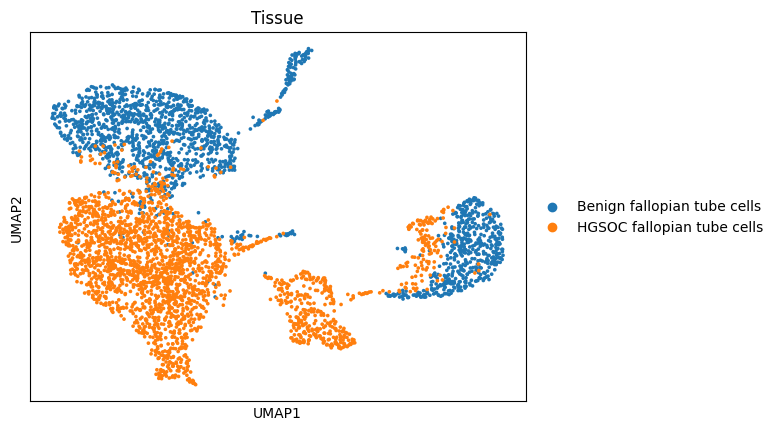

In [ ]:
sc.pl.umap(hu, color=['Tissue'])

**Figure Expanation**:

Visualising the dimensionality reduction of single-cell data from fallopian tube tissue, highlighting the separation between Benign fallopian tube cells (blue) and HGSOC (High-Grade Serous Ovarian Cancer) fallopian tube cells (orange). The distinct spatial clustering indicates that the cancerous cells exhibit a significantly different gene expression profile compared to the healthy cells, resulting in separate manifolds. However, the global structure suggests a shared lineage or tissue origin, with the separation driven by the specific molecular changes associated with the malignancy.


**Plotting the UMAP in the color of gene expression (use one of the genes from top 20 highly expressed genes):**



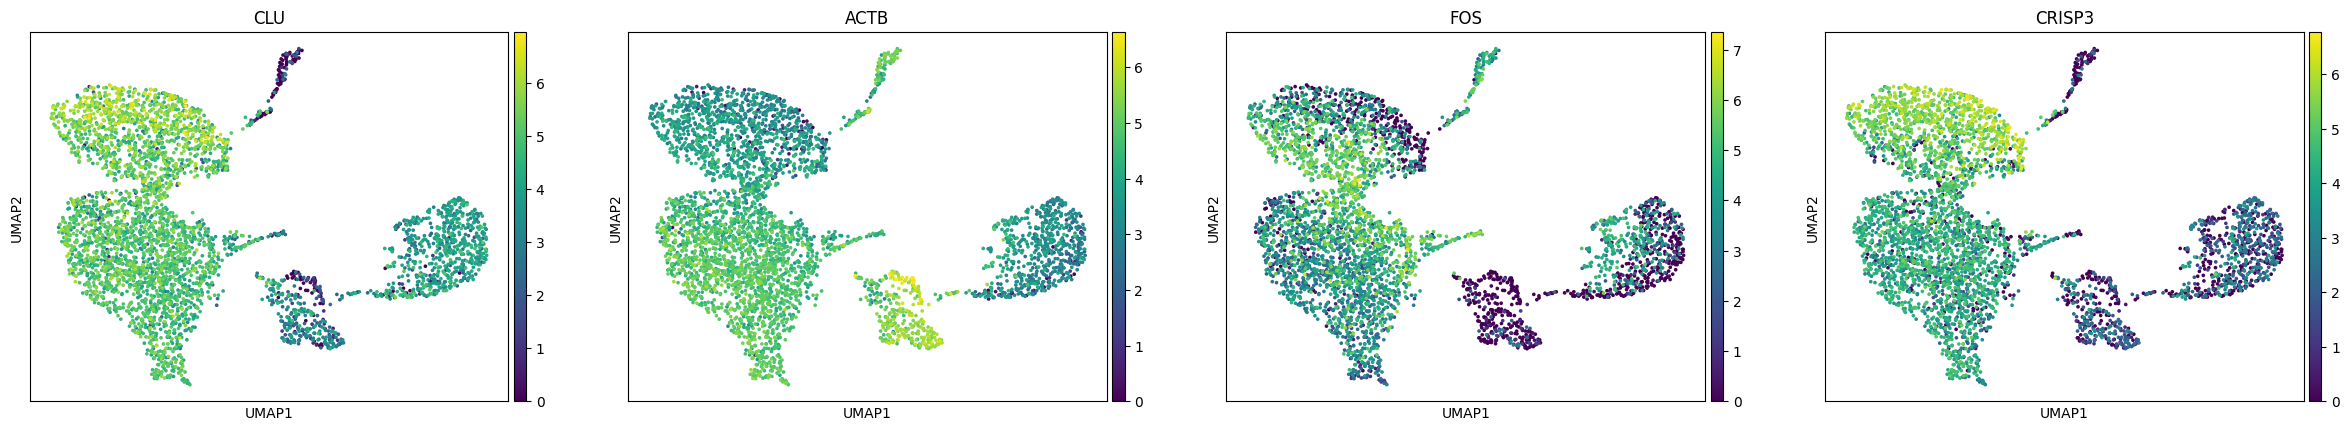

In [ ]:
sc.pl.umap(hu, color=['CLU','ACTB','FOS','CRISP3'])

**Examining how the UMAP structure changes when we change the number of pcs used to generate the n_neighbours graph**:

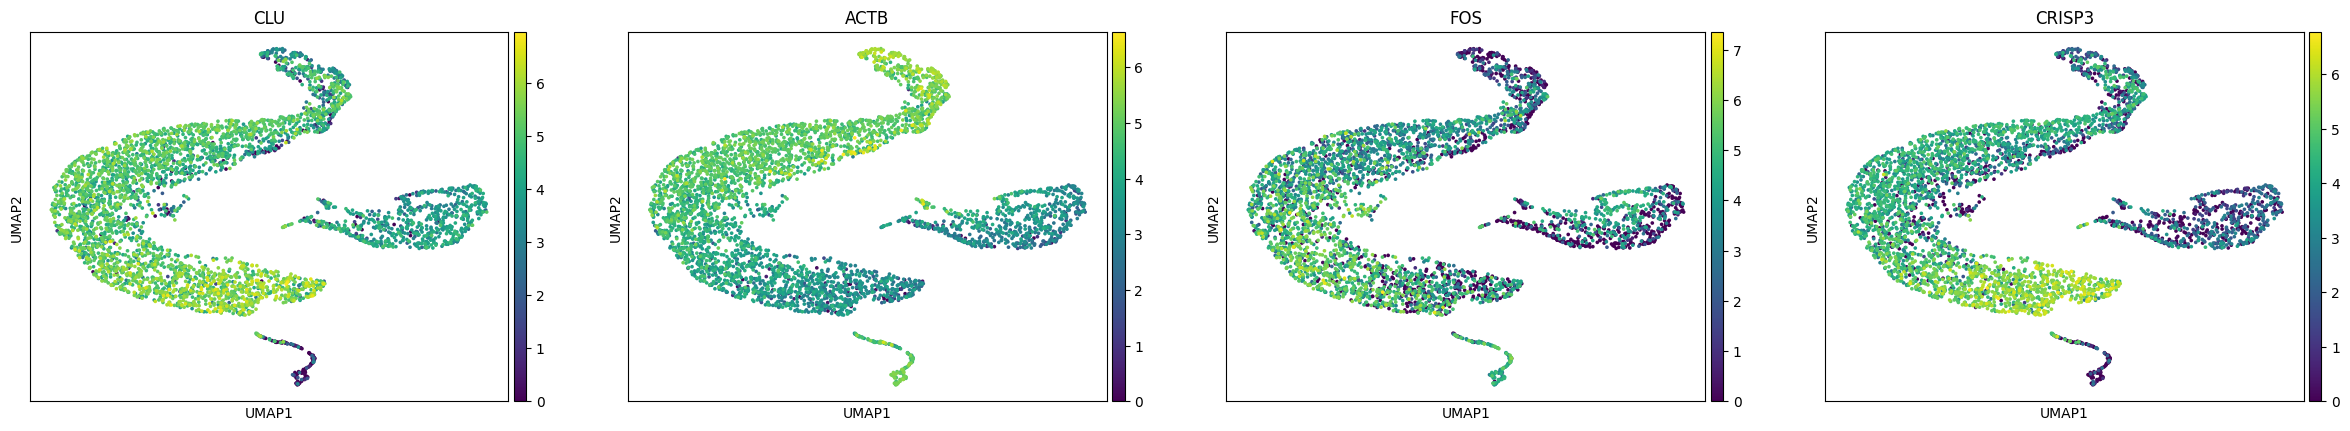

In [ ]:
sc.pp.neighbors(hu, n_pcs=3 )
sc.tl.umap(hu)
sc.pl.umap(hu, color=['CLU','ACTB','FOS','CRISP3'])

**Re-running the nearest neighbours graph and UMAP with optimal number of PCs:**

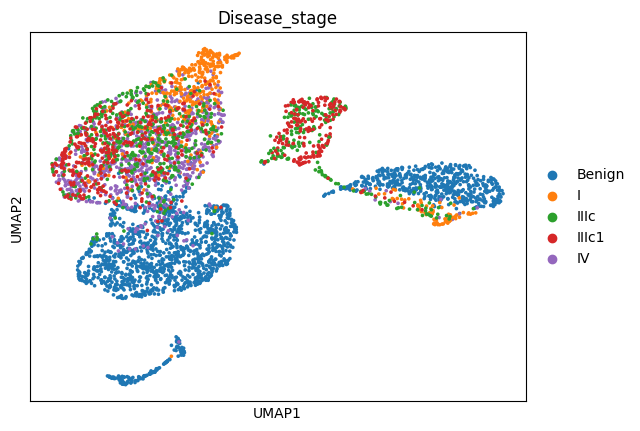

In [ ]:
sc.pp.neighbors(hu, n_pcs=5)
sc.tl.umap(hu)
sc.pl.umap(hu, color=['Disease_stage'])

**Figure Explanation**:

a low-dimensional representation of the dataset annotated by disease stage. The Benign samples (blue) form distinct, well-separated clusters, which indicates the clear transcriptomic divergence between healthy and malignant tissue. In contrast, the cancer populations—spanning Stage I (orange), IIIc (green), IIIc1 (red), and IV (purple)—are largely intermixed within the upper clusters. This overlap suggests that, in this projection, the gene expression profiles are highly similar across different stages of malignancy, indicating that the primary molecular shift occurs at the onset of the disease rather than progressing linearly through distinct transcriptomic states for each stage.

# **Leiden clustering**

**Performing leiden clustering and visualising clusters on the UMAP**


/tmp/ipython-input-2921422031.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(hu, resolution=0.2)


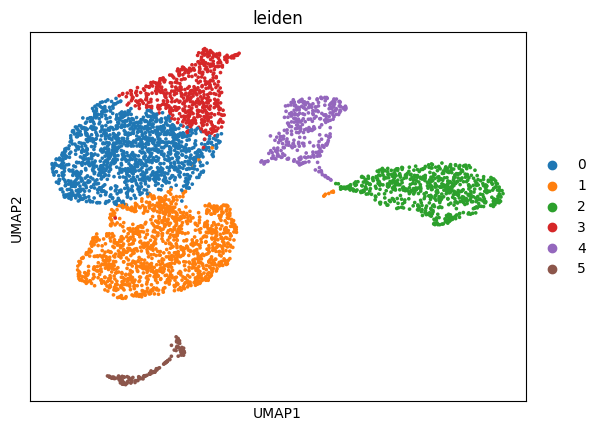

In [ ]:
sc.tl.leiden(hu, resolution=0.2)
sc.pl.umap(hu, color=['leiden'])

**Figure Explanation**:

This UMAP is constructed from the top 5 principal components. Cells are coloured according to the 6 distinct clusters (labelled 0–5) identified by the Leiden algorithm at a resolution of 0.2, where spatial proximity indicates transcriptional similarity.

**Calculating the top differentially expressed genes in each leiden cluster**


In [ ]:
sc.tl.rank_genes_groups(hu,'leiden', method='wilcoxon')

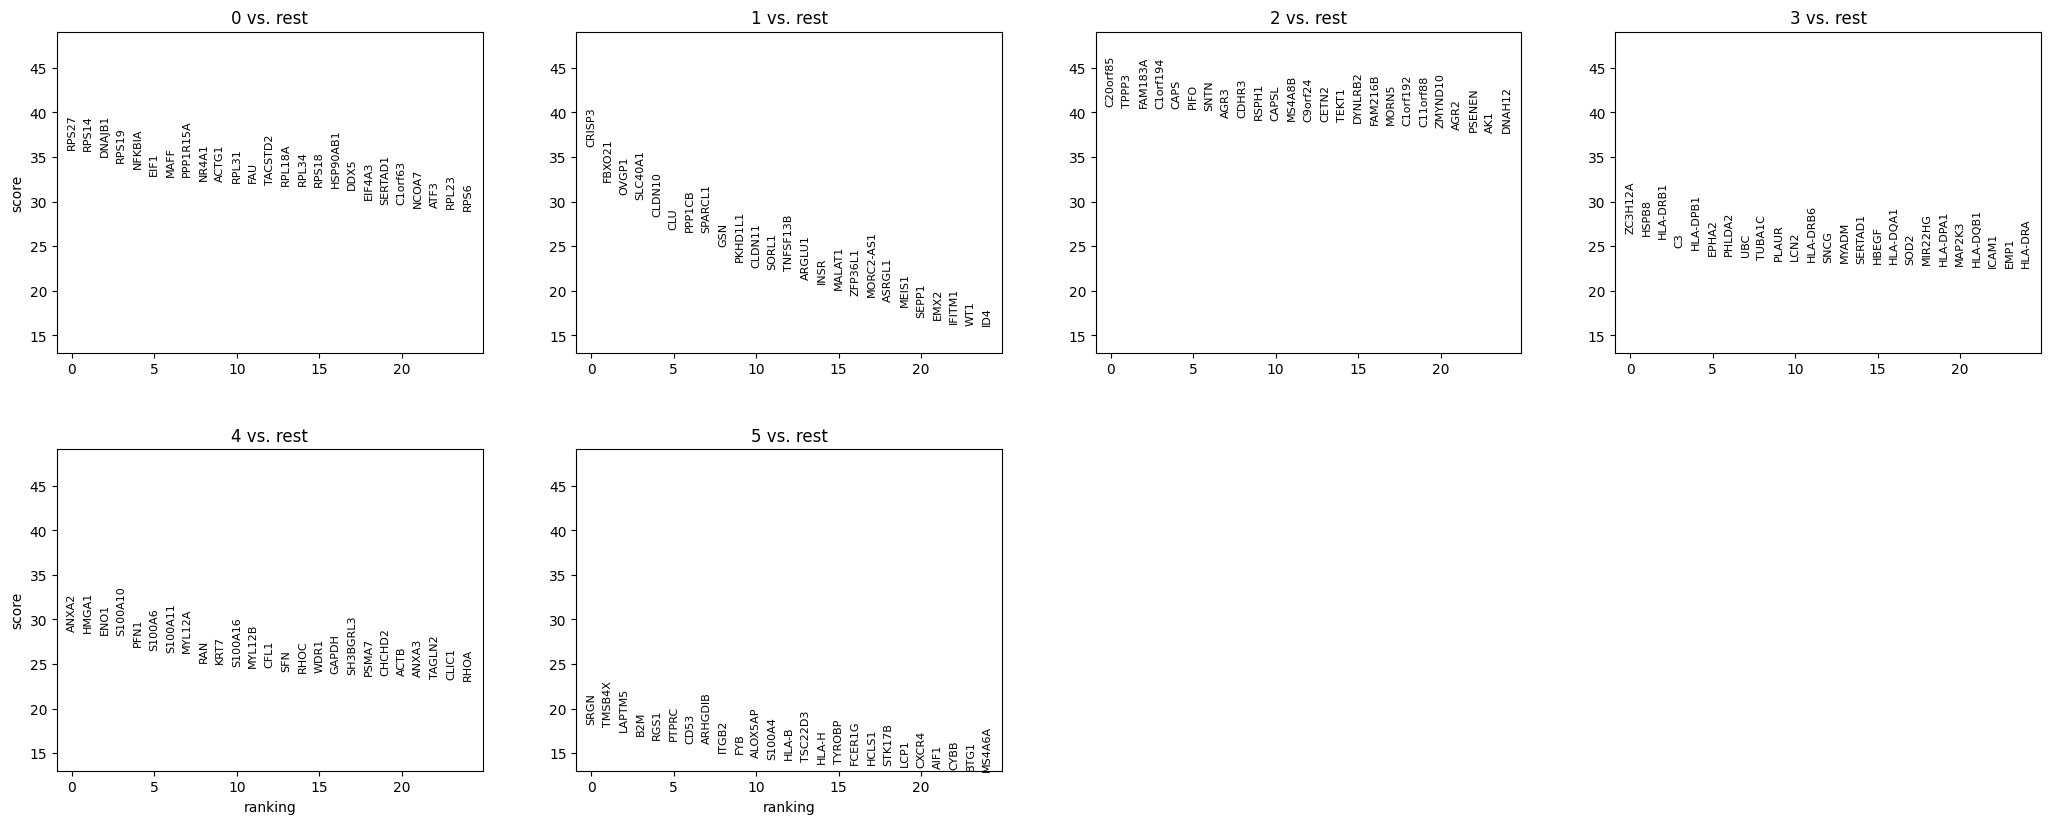

In [ ]:
sc.pl.rank_genes_groups(hu, n_genes=25)

**Exporting the ranked genes, with scores to a csv file**

In [ ]:
topmarkers=hu.uns['rank_genes_groups']
groups = topmarkers['names'].dtype.names
celltypemarkergenes = pd.DataFrame({group +'_'+key[:1]:topmarkers[key][group]
              for group in groups for key in ['names','scores']})

celltypemarkergenes.to_csv(r'/content/drive/MyDrive/scRNAproj/data/celltypemarkergenes.csv', index=False)

celltypemarkergenes

0_n        0_s      1_n        1_s       2_n        2_s  \
0          RPS27  35.895058   CRISP3  36.267090  C20orf85  40.752224   
1          RPS14  35.716881   FBXO21  32.294582     TPPP3  40.634541   
2         DNAJB1  35.049519    OVGP1  30.790676   FAM183A  40.580551   
3          RPS19  34.364311  SLC40A1  30.266169  C1orf194  40.522411   
4         NFKBIA  33.784180   CLDN10  28.317976      CAPS  40.442326   
...          ...        ...      ...        ...       ...        ...   
20367        CPM -18.522661   TMSB10 -32.100166     RPLP0 -34.894131   
20368     PPP1CB -19.337646   DNAJA1 -32.963715    RPL18A -35.062187   
20369     CLDN11 -23.979156    HSPH1 -33.300102      MSLN -35.445824   
20370  MORC2-AS1 -24.295176   TUBB4B -35.860874     RPS19 -35.965302   
20371   TNFSF13B -24.381296      EZR -37.735176     RPS18 -36.361027   

             3_n        3_s      4_n        4_s     5_n        5_s  
0        ZC3H12A  26.422888    ANXA2  28.625549    SRGN  18.248848  
1          HSPB8  26.203035    HMGA1  28.518904  TMSB4X  18.001652  
2       HLA-DRB1  25.914465     ENO1  28.335691  LAPTM5  17.447290  
3             C3  24.869734  S100A10  28.243383     B2M  17.017525  
4       HLA-DPB1  24.709324     PFN1  27.044037    RGS1  16.570076  
...          ...        ...      ...        ...     ...        ...  
20367      OVGP1  -8.821513     EGR1 -22.079750    CNN3 -16.184631  
20368  MORC2-AS1  -8.844854   MALAT1 -22.216867     CLU -16.229061  
20369   TNFSF13B -12.125319      CLU -23.289783   KRT19 -16.291546  
20370     PPP1CB -12.169432      FOS -23.620613    KRT8 -16.516361  
20371     CLDN11 -13.531795    H3F3B -25.366701   KRT18 -17.064213  

[20372 rows x 12 columns]

**Plotting top 20 differentially expressed genes in a heatmap**

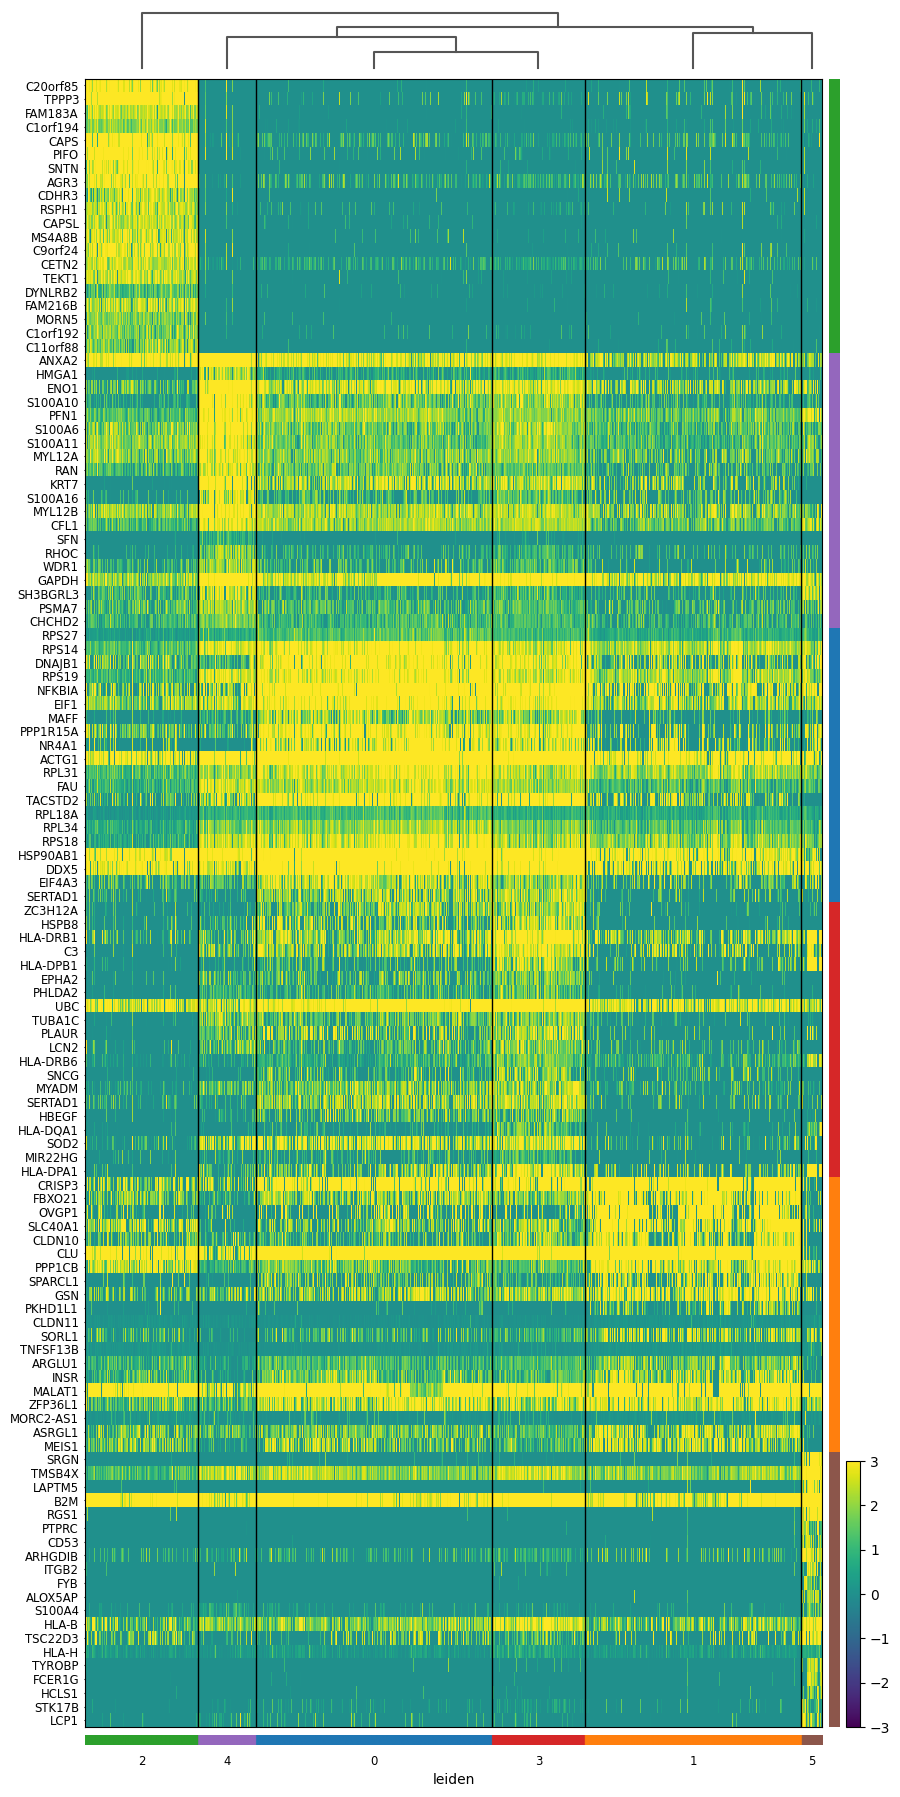

In [ ]:
sc.pl.rank_genes_groups_heatmap(hu, n_genes=20, swap_axes=True, show_gene_labels=True, vmin=-3, vmax=3 )

**Visualising marker genes to determine the cell types present in each cluster**

Secretory Epithelial : OVGP1

Ciliated Epithelial : FOXJ1, PIFO

Immune: PTPRC

Fibroblast: COL1A1, DCN

STIC lesion : KRT17


* sc.pl.violin(data, ['EPCAM','OVGP1','...'], groupby = 'leiden')


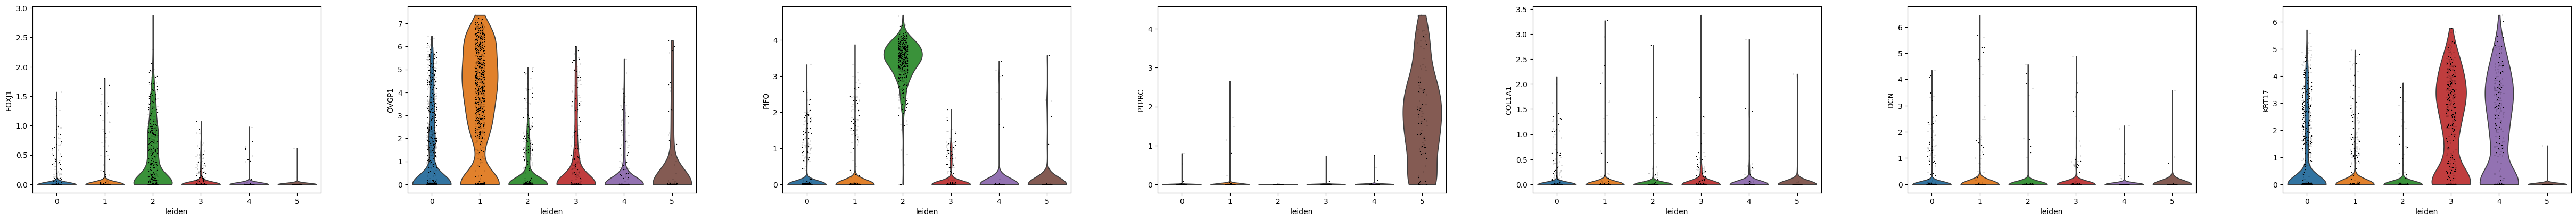

In [ ]:
sc.pl.violin(hu, ['FOXJ1','OVGP1','PIFO','PTPRC','KRT17'], groupby = 'leiden')

**Figure Explanation**:

These violin plots display the normalized expression distributions of marker genes used for cell annotation, where the width of the violin indicates the density of cells at a given expression level. Clusters exhibiting a specific lineage signature display a 'high expression, high density' pattern, characterized by a wider distribution bulging at elevated y-axis values (rather than being concentrated at zero). This visual pattern confirms biological identities: Cluster 2 is defined by ciliated markers (FOXJ1, PIFO), Cluster 5 by the immune marker PTPRC, and Cluster 1 by the secretory marker OVGP1. Upregulation of the stress marker KRT17 distinguishes Clusters 3 and 4 as STIC-associated populations, differentiating them from the transitional profiles of the remaining epithelial groups.

**Creating a dictionary defining Leiden clusters and their respective cell type**

In [ ]:
celltypedict = {
        '0' : 'Secretory Epithelial I',
        '1' : 'Secretory Epithelial II',
        '2' : 'Ciliated Epithelial',
        '3' : 'STIC leison I',
        '4' : 'STIC leison II',
        '5' : 'Immune',
        '6' : 'Fibroblast'
}

In [ ]:
hu.obs['Celltype'] = hu.obs['leiden'].map(celltypedict)

**Plotting a UMAP colored by cell types**

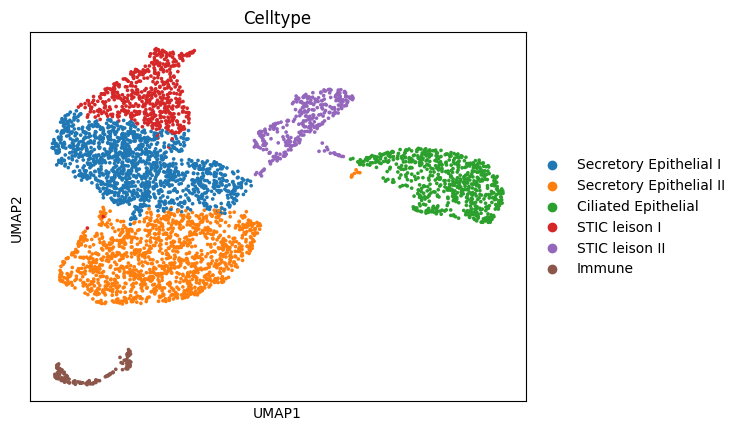

In [ ]:
sc.pl.umap(hu, color=['Celltype'])

**Figure Explanation**:

Within this UMAP, individual cells are coloured according to their assigned biological identities. The annotation shows distinct cellular populations, including two subpopulations of Secretory Epithelial cells (I and II), Ciliated Epithelial cells, and Immune cells. Additionally, two distinct clusters representing STIC lesions are identified, which highlights distinct states of disease progression or heterogeneity.

## **Querying GWAS catalog API**


**Using the GWAS catalog obtain a list of genes associated with high grade serous ovarian carcinoma**:

In this step, we integrate external genetic insights by programmatically querying the EBI GWAS Catalog (study GCST003588) to retrieve specific disease-associated loci and risk alleles. The raw JSON response is parsed and normalized into a structured format to extract a list of author-reported risk genes, which are subsequently filtered to retain only those present in the single-cell dataset's variable features. Finally, the expression of these GWAS-implicated genes is visualized across Leiden clusters using a dot plot to identify cell-type-specific enrichment, while UMAP projections are generated to contextualize these findings alongside disease stage and key marker genes (TUBA1C, KRT8, HLA-C).


In [ ]:
import requests
import json

In [ ]:
response=requests.get("https://www.ebi.ac.uk/gwas/rest/api/studies/GCST003588/associations")
response.json()

{'_embedded': {'associations': [{'riskFrequency': 'NR',
    'pvalueDescription': '(subset analysis)',
    'pvalueMantissa': 5,
    'pvalueExponent': -10,
    'multiSnpHaplotype': False,
    'snpInteraction': False,
    'snpType': 'novel',
    'standardError': None,
    'range': None,
    'description': None,
    'orPerCopyNum': None,
    'betaNum': None,
    'betaUnit': None,
    'betaDirection': None,
    'loci': [{'haplotypeSnpCount': None,
      'description': 'Single variant',
      'strongestRiskAlleles': [{'riskAlleleName': 'rs186507655-A',
        'riskFrequency': 'NR',
        'genomeWide': False,
        'limitedList': False,
        '_links': {'proxySnps': {'href': 'https://www.ebi.ac.uk/gwas/rest/api/singleNucleotidePolymorphisms/NR{?projection}',
          'templated': True},
         'snp': {'href': 'https://www.ebi.ac.uk/gwas/rest/api/singleNucleotidePolymorphisms/rs186507655{?projection}',
          'templated': True}}}],
      'authorReportedGenes': [{'geneName': 'Inter

**Making a Pandas dataframe containing 'riskAlleleName' and 'geneName'**

In [ ]:
associations_data = response.json()['_embedded']['associations']
gwas = pd.json_normalize(associations_data, 'loci')
risk_alleles = gwas.explode('strongestRiskAlleles').explode('authorReportedGenes').reset_index(drop=True)
risk_alleles_df = pd.json_normalize(risk_alleles['strongestRiskAlleles'])
reportedgenes_df = pd.json_normalize(risk_alleles['authorReportedGenes'])
gwasgenes=pd.concat([risk_alleles_df, reportedgenes_df], axis=1)
gwasgenes = gwasgenes[['riskAlleleName', 'geneName']]

In [ ]:
genes=[gene for gene in gwasgenes['geneName'].tolist() if gene !='Intergenic' and gene in hu.raw.var_names]

**Plotting gene expression of Carcinoma GWAS genes per leiden cluster in a dot plot**


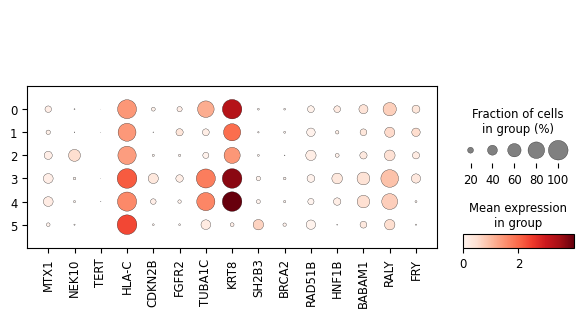

In [ ]:
sc.pl.dotplot(hu, var_names=genes, groupby='leiden')

**Figure Explanation**:

This dot plot visualizes the expression profiles of the GWAS-identified ovarian cancer risk genes across the identified Leiden clusters. The size of each dot represents the fraction of cells within a cluster expressing the gene, while the color intensity indicates the mean expression level. The plot reveals significant heterogeneity in the expression of susceptibility loci; notably, KRT8 and TUBA1C show high mean expression and broad prevalence in specific subpopulations (particularly clusters 0, 3, and 4), suggesting these clusters may represent the epithelial or transformed populations most relevant to the study. HLA-C exhibits widespread expression across all clusters, indicating a ubiquitous presence of this immune-related marker. Conversely, well-known risk genes such as BRCA2, TERT, and RAD51B show sparse expression (small, faint dots), which is consistent with the typically low capture rate of low-abundance regulatory transcripts in droplet-based single-cell RNA sequencing.

**Plotting gene expression of the highly expressed carcinoma GWAS genes in a UMAP, compare this to a UMAP of Disease Stage**

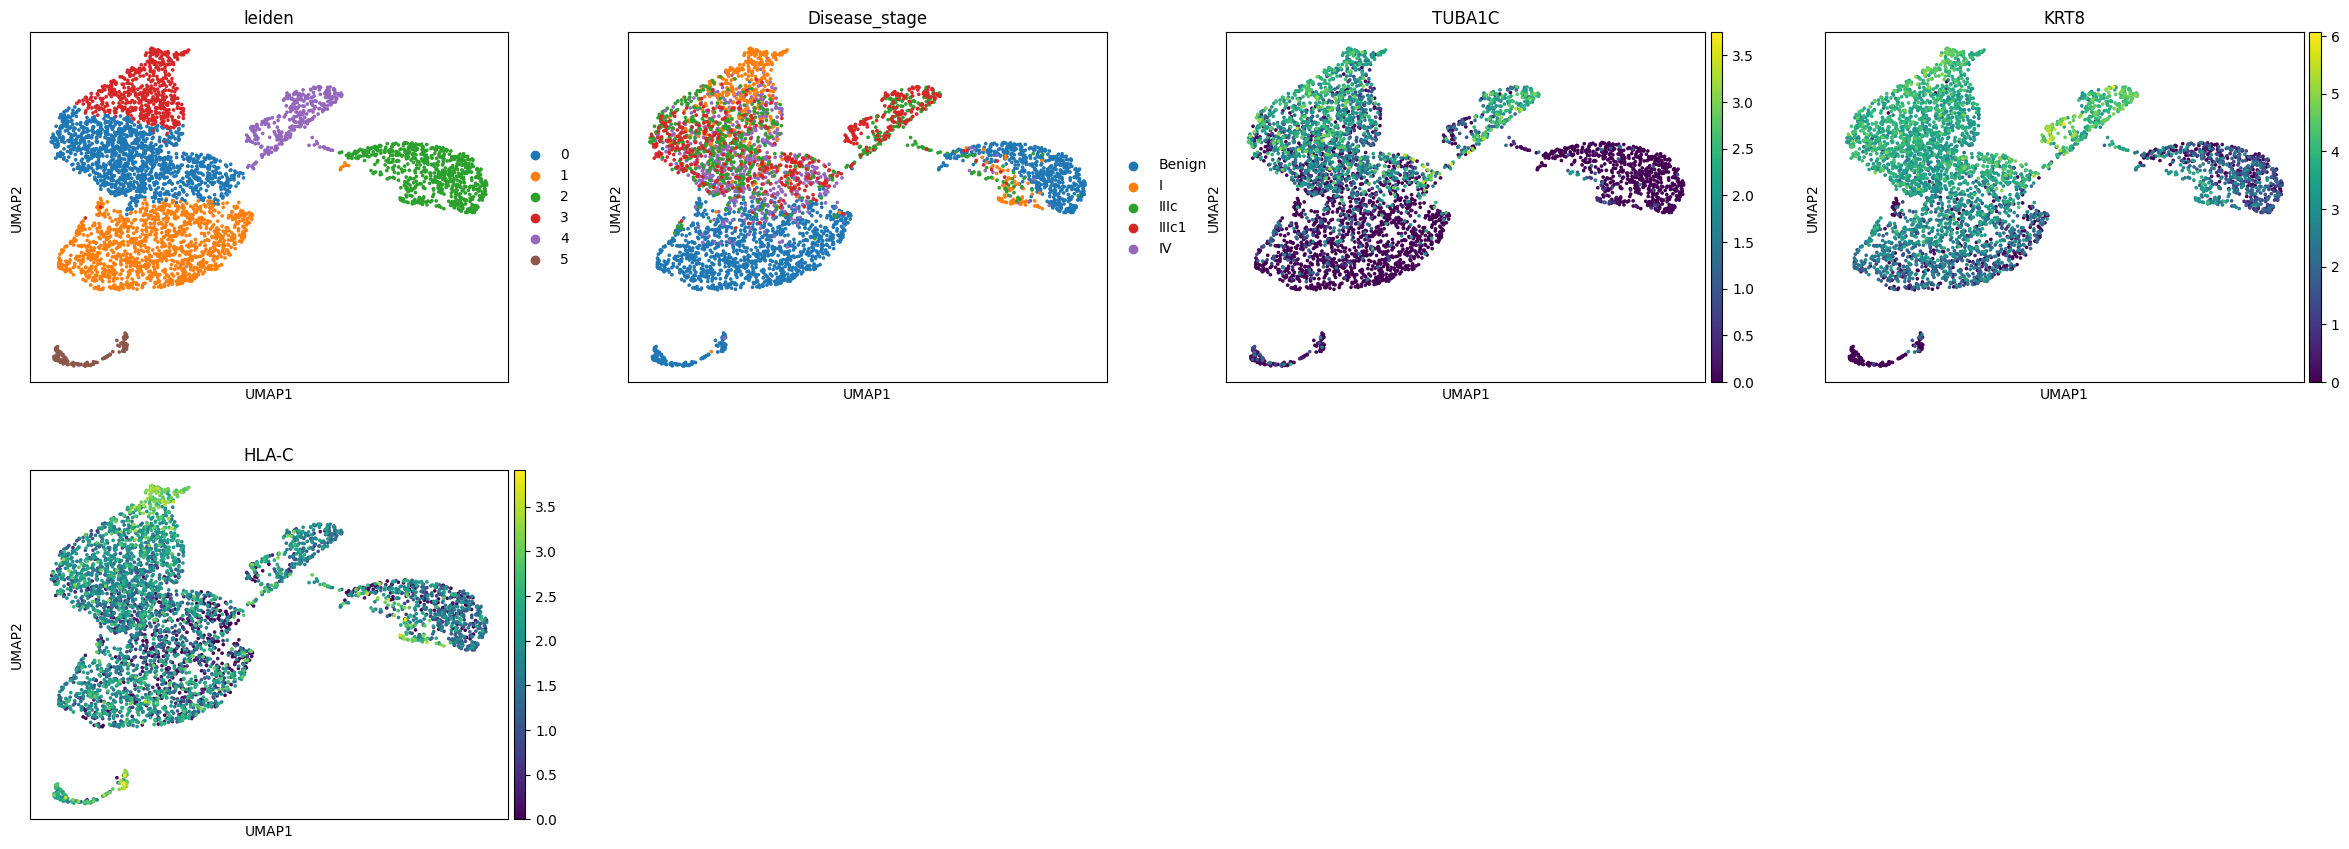

In [ ]:
sc.pl.umap(hu, color=['leiden','Disease_stage','TUBA1C','KRT8','HLA-C'])

**Figure Explanation**:

This multi-panel UMAP figure synthesizes clustering, metadata, and gene expression to characterize the dataset's structure. Comparing the 'leiden' and 'Disease_stage' plots reveals a clear biological demarcation: the bottom cluster (Leiden cluster 1) corresponds almost exclusively to Benign samples, while the upper clusters (Leiden 0, 2, 3, and 4) represent the heterogeneous Cancer populations (Stages I–IV). This separation is further validated by the gene expression feature plots; the GWAS-identified risk genes TUBA1C and KRT8 exhibit strong, specific upregulation (yellow/green signal) within the malignant clusters while remaining virtually absent in the benign population. In contrast, HLA-C displays a more ubiquitous expression pattern across both healthy and disease states, suggesting a broader presence independent of the malignant transformation in this tissue.

## **Subsetting secretory epithelial cells**
As HGOC is thought to originate from epithelial cells in the fallopian tube, we can examine epithelial cells in greater depth by creating a subset of the data of epithelial cells.

**1. Create new object of a subset of epithelial cell data**

In [ ]:
epithelial_cells = hu[hu.obs['Celltype'].isin(['Secretory Epithelial I', 'Secretory Epithelial II', 'Ciliated Epithelial'])].copy()
print(f"New object contains {epithelial_cells.n_obs} cells and {epithelial_cells.n_vars} genes.")

New object contains 3285 cells and 5827 genes.


In [ ]:
epithelial_cells

AnnData object with n_obs × n_vars = 3285 × 5827
    obs: 'Patient', 'Author', 'Tissue', 'Disease_stage', 'Age', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'Celltype'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'Disease_stage_colors', 'neighbors', 'umap', 'Tissue_colors', 'leiden', 'leiden_colors', 'rank_genes_groups', 'dendrogram_leiden', 'Celltype_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

**2. Run the dimensionality reduction and clustering analysis again to identify clusters of epitheilal cells**

In [ ]:
sc.tl.pca(epithelial_cells, svd_solver='arpack')

In [ ]:
sc.pp.neighbors(epithelial_cells, n_pcs=6)

In [ ]:
sc.tl.umap(epithelial_cells)

In [ ]:
sc.tl.leiden(epithelial_cells, resolution=0.2)

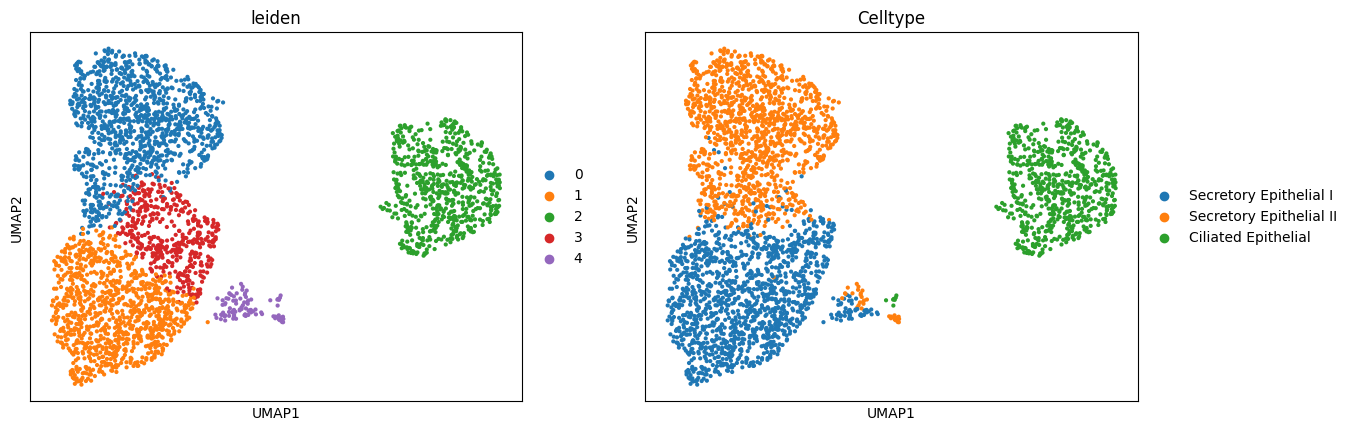

In [ ]:
sc.pl.umap(epithelial_cells, color=['leiden', 'Celltype'])

**Figure Explanation**:

This figure illustrates the sub-clustering analysis specifically performed on the epithelial cell subset, comparing unsupervised Leiden clustering (resolution 0.2) with biological cell type annotations. The UMAP plots reveal a clear spatial segregation between the distinct epithelial lineages: Ciliated Epithelial cells form a completely separate island (Leiden cluster 2), confirming their unique transcriptomic identity distinct from the secretory lineage. The Secretory Epithelial cells segregate into two primary populations (I and II), with the Leiden algorithm revealing further heterogeneity within the Secretory Epithelial II group (split across clusters 1, 3, and 4). This substructure suggests the presence of distinct functional states or differentiation stages within the secretory lineage that broad annotations might overlook.